<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210529_nichidai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題内容
図1の散布図のように，$0.5 \leq |x -1|, |y -1| \leq 1$の範囲の値をとる変量$x, y$で表される2種類のサンプルが多数ある. それぞれの種類のらしさをうまく表すニューラルネットワークを実際に1つ作ってみなさい.

# 準備
## 必要なライブラリのインストール/インポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## データの生成

In [ ]:
def rand(size, a=0, b=1):
    return (b - a) * np.random.random(size) + a

def generate_cluster(x_range=(0, 0.5), y_range=(0, 0.5), npoints=100, label=1):
    return np.array([
                  rand(npoints, *x_range), 
                  rand(npoints, *y_range)
            ]).T, np.ones(npoints) * label

npoints = 100
data1, data1_label = generate_cluster(x_range=(1.5, 2.0), y_range=(1.5, 2.0), npoints=npoints, label=1)
data2, data2_label = generate_cluster(x_range=(1.5, 2.0), y_range=(0.0, 0.5), npoints=npoints, label=2)
data3, data3_label = generate_cluster(x_range=(0.0, 0.5), y_range=(0.0, 0.5), npoints=npoints, label=1)
data4, data4_label = generate_cluster(x_range=(0.0, 0.5), y_range=(1.5, 2.0), npoints=npoints, label=2)

In [ ]:
X = np.concatenate((data1, data3, data2, data4)) 
y = np.concatenate((data1_label, data3_label, data2_label, data4_label))
data_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y
})

ここではデータ中の各クラスタに下の通り1から4の番号をふって区別する．また，$0.0 \leq x \leq 0.5$，$1.5 \leq x \leq 2$の範囲をそれぞれ$x_\rm{small}$，$x_\rm{large}$，
$0.0 \leq y \leq 0.5$，$1.5 \leq y \leq 2$をそれぞれ$y_\rm{small}$，$y_\rm{large}$と呼ぶことにする

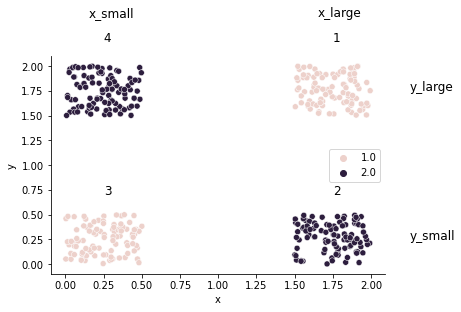

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", data=data_df, hue="label", ax=ax)
ax.text(1.75, 2.25, "1", fontsize=12)
ax.text(1.75, 0.7, "2", fontsize=12)
ax.text(0.25, 0.7, "3", fontsize=12)
ax.text(0.25, 2.25, "4", fontsize=12)
ax.text(1.65, 2.5, "x_large", fontsize=12)
ax.text(0.15, 2.5, "x_small", fontsize=12)
ax.text(2.25, 0.25, "y_small", fontsize=12)
ax.text(2.25, 1.75, "y_large", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(loc="center right")

## 色々なニューロンを実装するための雛形となるクラスを用意する

In [ ]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [ ]:
def check_activation(neuron, label):
    """各クラスタ中のデータに対してニューロンがどのように活動するかを可視化する関数
    """
    plt.title(f"activation of {label} neuron")
    plt.scatter(np.ones(npoints), neuron.forward(data1), label="data1")
    plt.scatter(np.ones(npoints)*1.1, neuron.forward(data2), label="data2")
    plt.scatter(np.ones(npoints)*1.2, neuron.forward(data3), label="data3")
    plt.scatter(np.ones(npoints)*1.3, neuron.forward(data4), label="data4")
    plt.xlabel("Cluster")
    plt.ylabel("Activation")
    plt.xticks([])
    plt.legend()

In [ ]:
sample_neuron = Neuron(
    W=np.array([[0.1, 0.1]]),
    bias=0.5
)

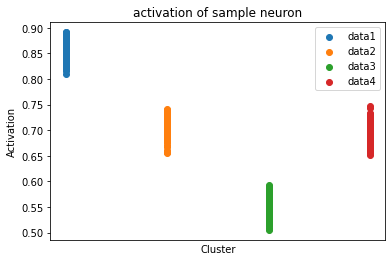

In [ ]:
check_activation(sample_neuron, "sample")

# 解答例１
この解答例ではまず，$x_\rm{small}$，$x_\rm{large}$, $y_\rm{small}$, $y_\rm{large}$それぞれに属するデータを入力されたときに0でない活動を示すニューロンを第一層に用意し，その次の層にそれらの出力を利用して各クラスタを識別するニューロンを配置する．そして出力層でクラスタをまとめ上げてグループ1とグループ２を識別する．

In [ ]:
# x_largeに対して0でない活動をするニューロン
x_large_neuron = Neuron(
    W=np.array([[0.5, 0.0]]),
    bias = -0.5
)

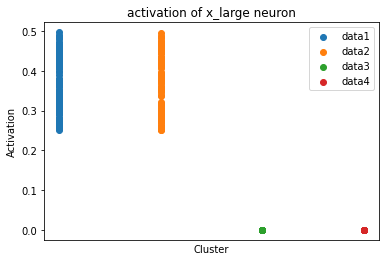

In [ ]:
check_activation(x_large_neuron, "x_large")

In [ ]:
# x_small
x_small_neuron = Neuron(
    W=np.array([[-0.5, 0.0]]),
    bias = 0.5
)

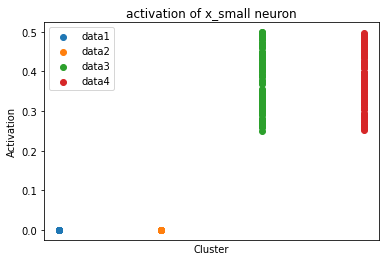

In [ ]:
check_activation(x_small_neuron, "x_small")

In [ ]:
y_large_neuron = Neuron(
    W=np.array([[0.0, 0.5]]),
    bias = -0.5
)

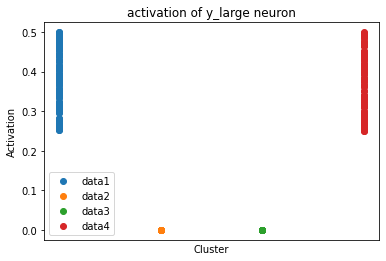

In [ ]:
check_activation(y_large_neuron, "y_large")

In [ ]:
y_small_neuron = Neuron(
    W=np.array([[0.0, -0.5]]),
    bias = 0.5
)

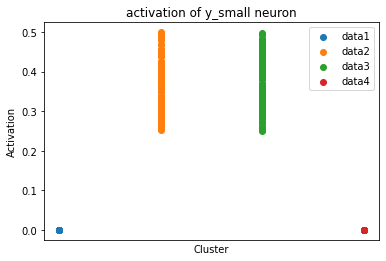

In [ ]:
check_activation(y_small_neuron, "y_small")

In [ ]:
layer1 = [[x_small_neuron, x_large_neuron, y_small_neuron, y_large_neuron]]

In [ ]:
data1_neuron = Neuron(
    W=np.array([[0.0, 0.5, 0.0, 0.5]]),
    bias=-0.25,
    layers =layer1
)

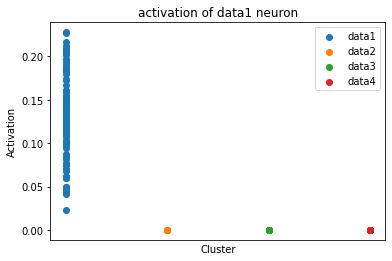

In [ ]:
check_activation(data1_neuron, "data1")

In [ ]:
data2_neuron = Neuron(
    W=np.array([[0.0, 1.5, 1.5, 0.0]]),
    bias=-0.25,
    layers =layer1
)

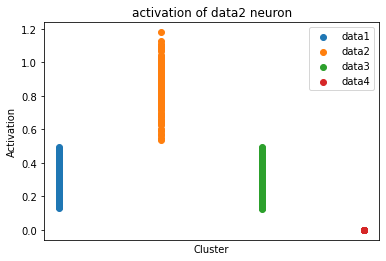

In [ ]:
check_activation(data2_neuron, "data2")

In [ ]:
 data3_neuron = Neuron(
    W=np.array([[0.5, 0.0, 0.5, 0.0]]),
    bias=-0.25,
    layers =layer1
)

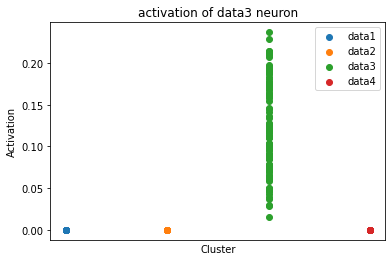

In [ ]:
check_activation(data3_neuron, "data3")

In [ ]:
data4_neuron = Neuron(
    W=np.array([[0.5, 0.0, 0.0, 0.5]]),
    bias=-0.25,
    layers =layer1
)

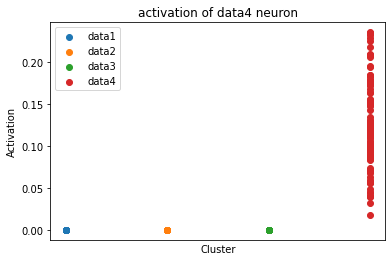

In [ ]:
check_activation(data4_neuron, "data4")

In [ ]:
layer2 = [[data1_neuron, data2_neuron, data3_neuron, data4_neuron]]

In [ ]:
group1_neuron = Neuron(
    W=np.array([[0.5, 0.0, 0.5, 0.0]]),
    bias=0.0,
    layers = layer2
)

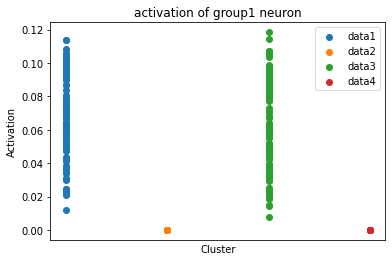

In [ ]:
check_activation(group1_neuron, "group1")

In [ ]:
group2_neuron = Neuron(
    W=np.array([[-0.5, 0.0, 0.0, -0.5]]),
    bias=0.15,
    layers = layer2
)

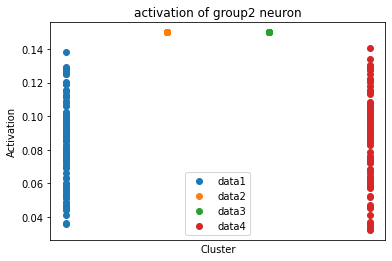

In [ ]:
check_activation(group2_neuron, "group2")

In [ ]:
## 解答2

In [ ]:
and_neuron = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-1.25
)

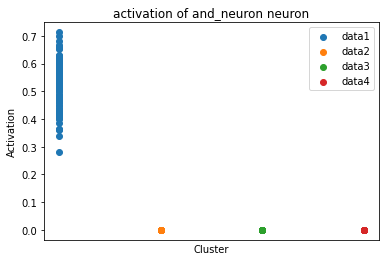

In [ ]:
check_activation(and_neuron, "and_neuron")

In [ ]:
or_neuron = Neuron(
    W=np.array([[0.5,0.5]]),
    bias=-0.75
)

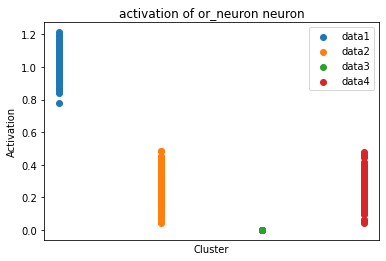

In [ ]:
check_activation(or_neuron, "or_neuron")

In [ ]:
nand_neuron = Neuron(
    W=np.array([[-0.5, -0.5]]),
    bias=1.25
)

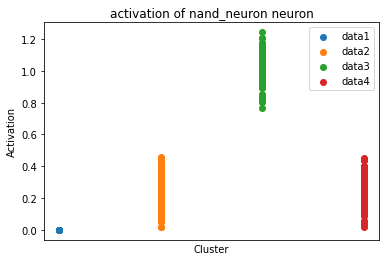

In [ ]:
check_activation(nand_neuron, "nand_neuron")

In [ ]:
layer1 = [[nand_neuron, or_neuron]]

In [ ]:
xor_neuron = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-0.25,
    layers=layer1
)

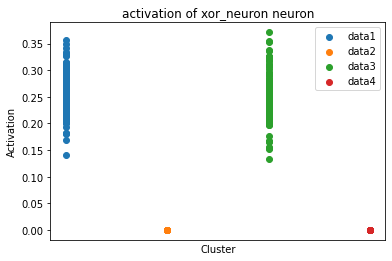

In [ ]:
check_activation(xor_neuron, "xor_neuron")